In [1]:
import numpy as np
from scipy.stats import norm, chi2
from scipy.special import lambertw
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [2]:
alpha = 0.02
beta = 0.1

mu1 = 10
mu2 = 11
sigma = 3

n = ((norm.ppf(beta) - norm.ppf(1 - alpha)) * sigma / (mu1 - mu2))**2

In [3]:
stat1, stat2 = [], []
for i in range(10000):
    size = 100
    data1 = np.random.normal(mu1, sigma, size)
    data2 = np.random.normal(mu2, sigma, size)
    
    t1 = (2 * data1.sum() * (mu2 - mu1) + size * (mu1**2 - mu2**2)) / sigma / 2
    t2 = (2 * data2.sum() * (mu2 - mu1) + size * (mu1**2 - mu2**2)) / sigma / 2
    stat1.append(t1)
    stat2.append(t2)

$$t\sim N\left(\frac{200\mu_{1}(\mu_{2} - \mu_{1}) + 100(\mu_{1}^{2} - \mu_{2}^{2})}{2\sigma}, 100(\mu_{2} - \mu_{1})^{2}\right) = N(-50, 100)$$

In [4]:
c1 = norm.ppf(1 - alpha, loc=(2 * size * mu1 * (mu2 - mu1) + size * (mu1**2 - mu2**2)) / 2 / sigma, scale=np.sqrt(size * (mu1 - mu2)**2))
c2 = norm.ppf(beta, loc=(2 * size * mu2 * (mu2 - mu1) + size * (mu1**2 - mu2**2)) / 2 / sigma, scale=np.sqrt(size * (mu1 - mu2)**2))

In [5]:
c1, c2

(3.8708224396515583, 3.851151011220665)

In [6]:
c = min(c1, c2)

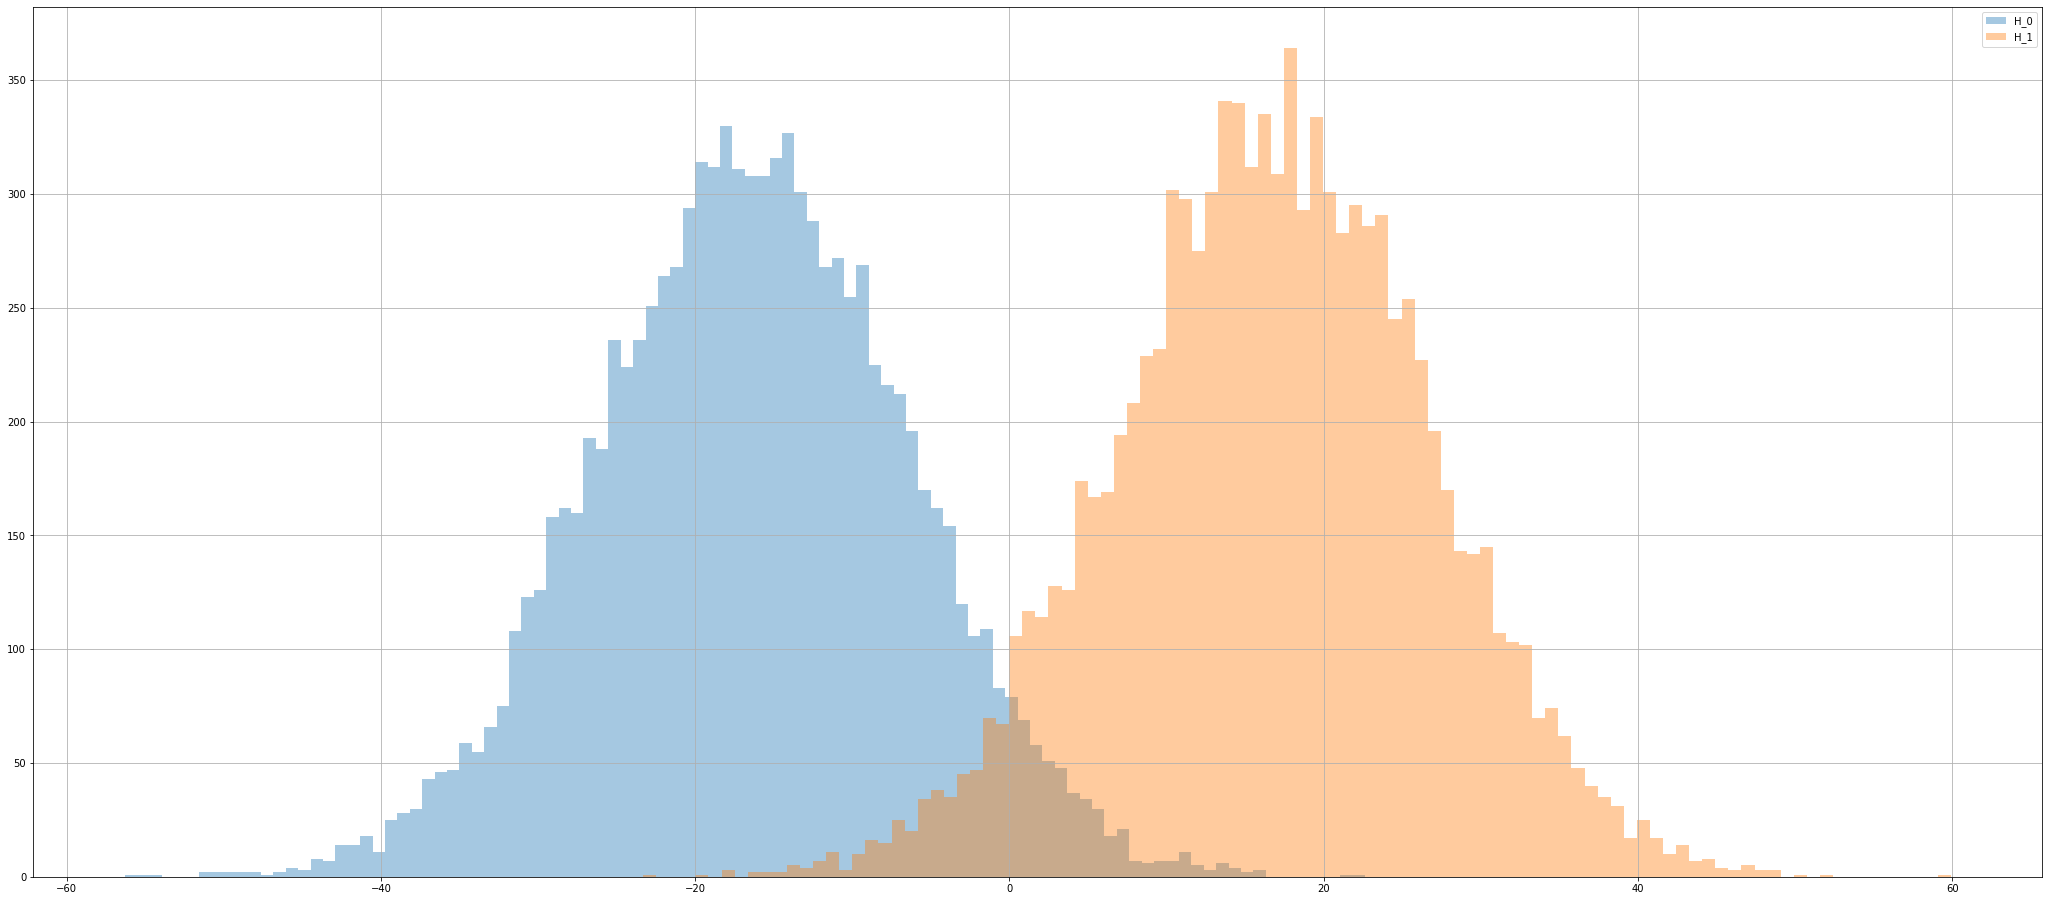

In [7]:
plt.figure(figsize=(36, 16))
plt.hist(stat1, bins=100, alpha=0.4, label='H_0')
plt.hist(stat2, bins=100, alpha=0.4, label='H_1')
plt.legend()
plt.grid()
plt.show()

In [9]:
num_tests = 2000
res1, res2 = [], []
for size in tqdm(range(5, np.ceil(n).astype(int) * 2)):
    res1.append(0)
    res2.append(0)
    c1 = norm.ppf(1 - alpha, loc=(2 * size * mu1 * (mu2 - mu1) + size * (mu1**2 - mu2**2)) / 2 / sigma, scale=np.sqrt(size * (mu1 - mu2)**2))
    c2 = norm.ppf(beta, loc=(2 * size * mu2 * (mu2 - mu1) + size * (mu1**2 - mu2**2)) / 2 / sigma, scale=np.sqrt(size * (mu1 - mu2)**2))
    c = np.mean([c1, c2])
    for i in range(num_tests):
        data1 = np.random.normal(mu1, sigma, size)
        data2 = np.random.normal(mu2, sigma, size)

        t1 = (2 * data1.sum() * (mu2 - mu1) + size * (mu1**2 - mu2**2)) / sigma / 2
        t2 = (2 * data2.sum() * (mu2 - mu1) + size * (mu1**2 - mu2**2)) / sigma / 2
        res1[-1] += t1 <= c
        res2[-1] += t2 <= c
    res1[-1] /= num_tests
    res2[-1] /= num_tests

  0%|          | 0/197 [00:00<?, ?it/s]

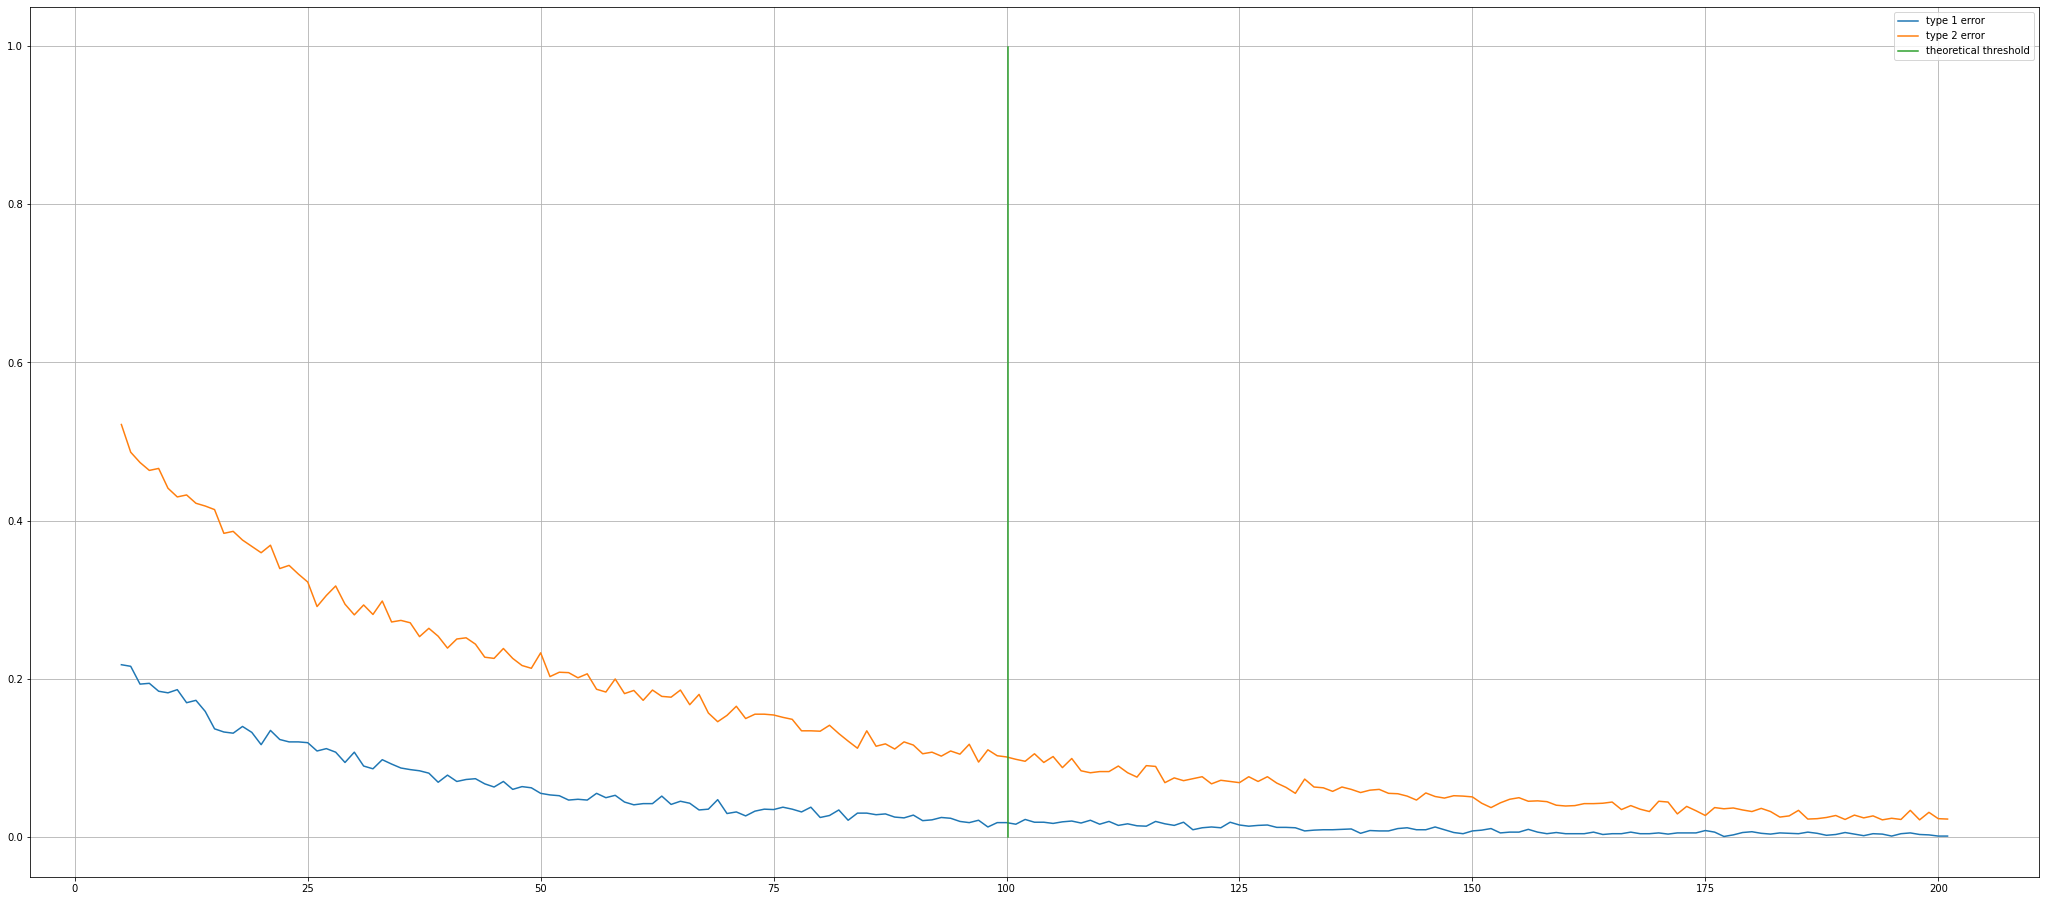

In [10]:
plt.figure(figsize=(36, 16))
plt.plot(list(range(5, np.ceil(n).astype(int) * 2)), 1 - np.asarray(res1), label='type 1 error')
plt.plot(list(range(5, np.ceil(n).astype(int) * 2)), res2, label='type 2 error')
plt.plot([n, n], [0, max(np.max(res2), np.max(res1))], label='theoretical threshold')
plt.legend()
plt.grid()
plt.show()

In [11]:
alpha = 0.02
beta = 0.1

mu1 = 10
mu2 = 11
sigma = 10

n = ((norm.ppf(beta) - norm.ppf(1 - alpha)) * sigma / (mu1 - mu2))**2

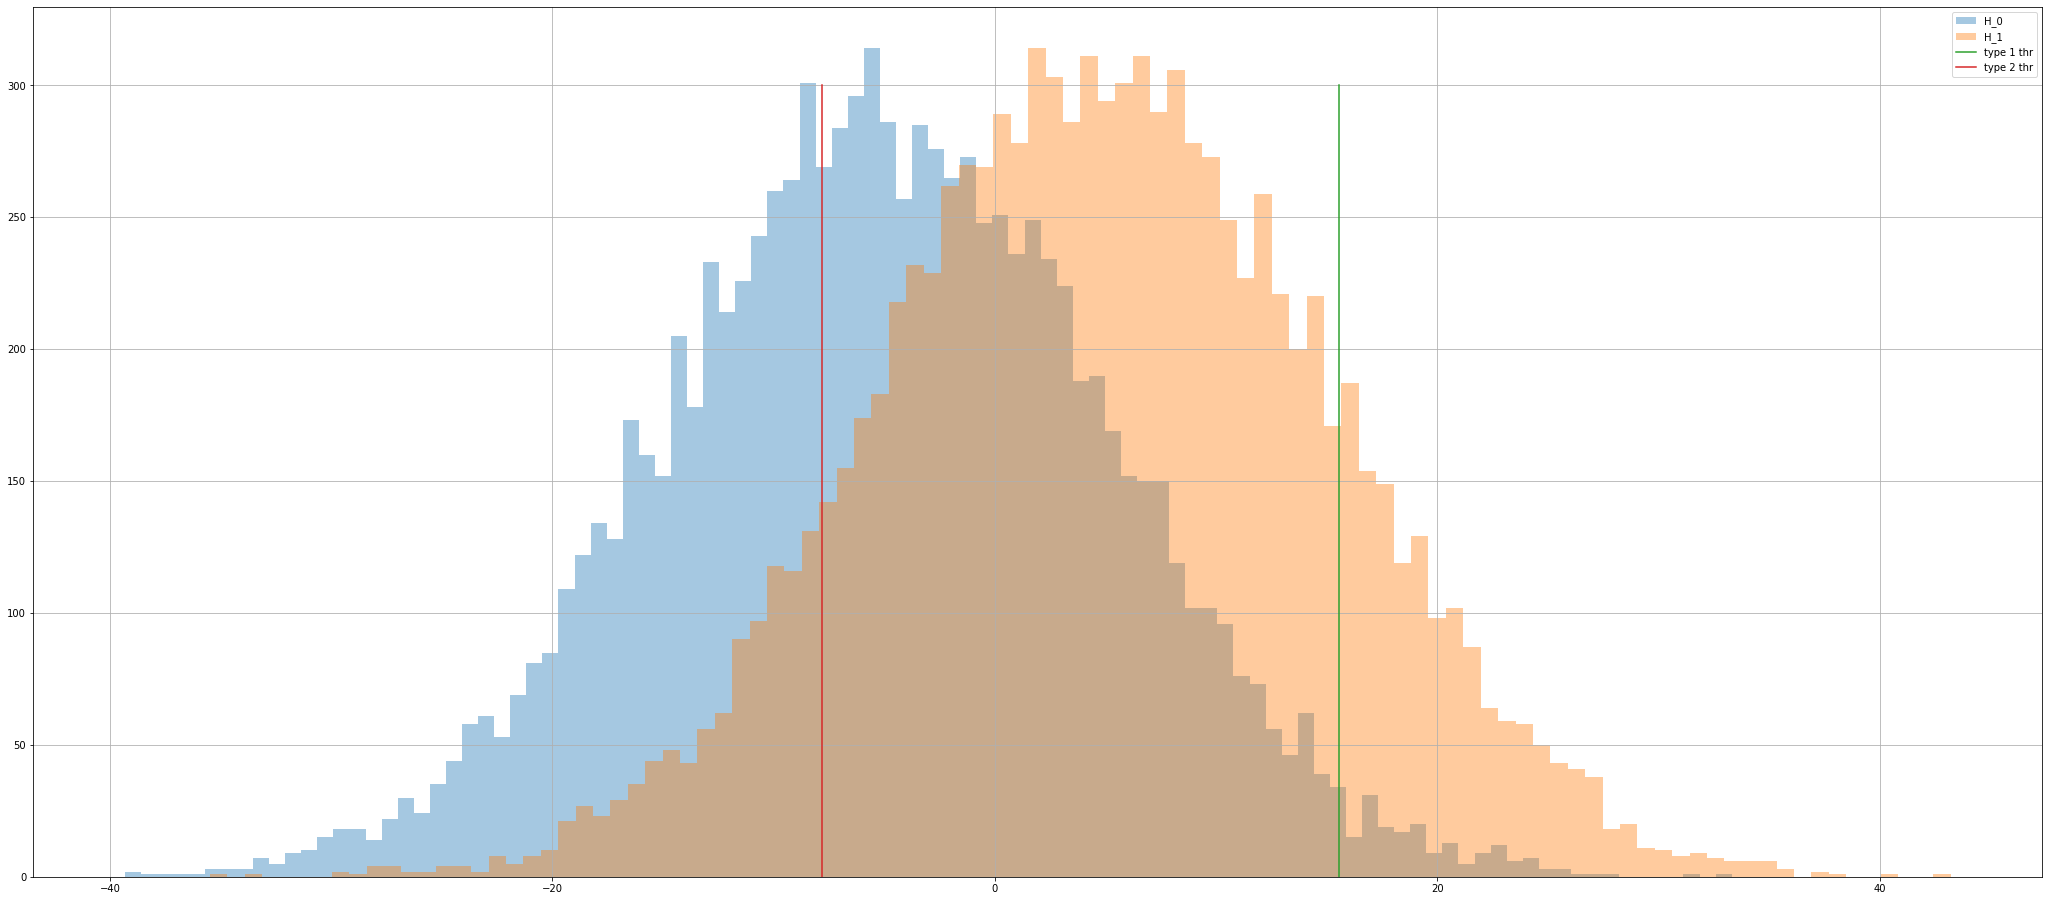

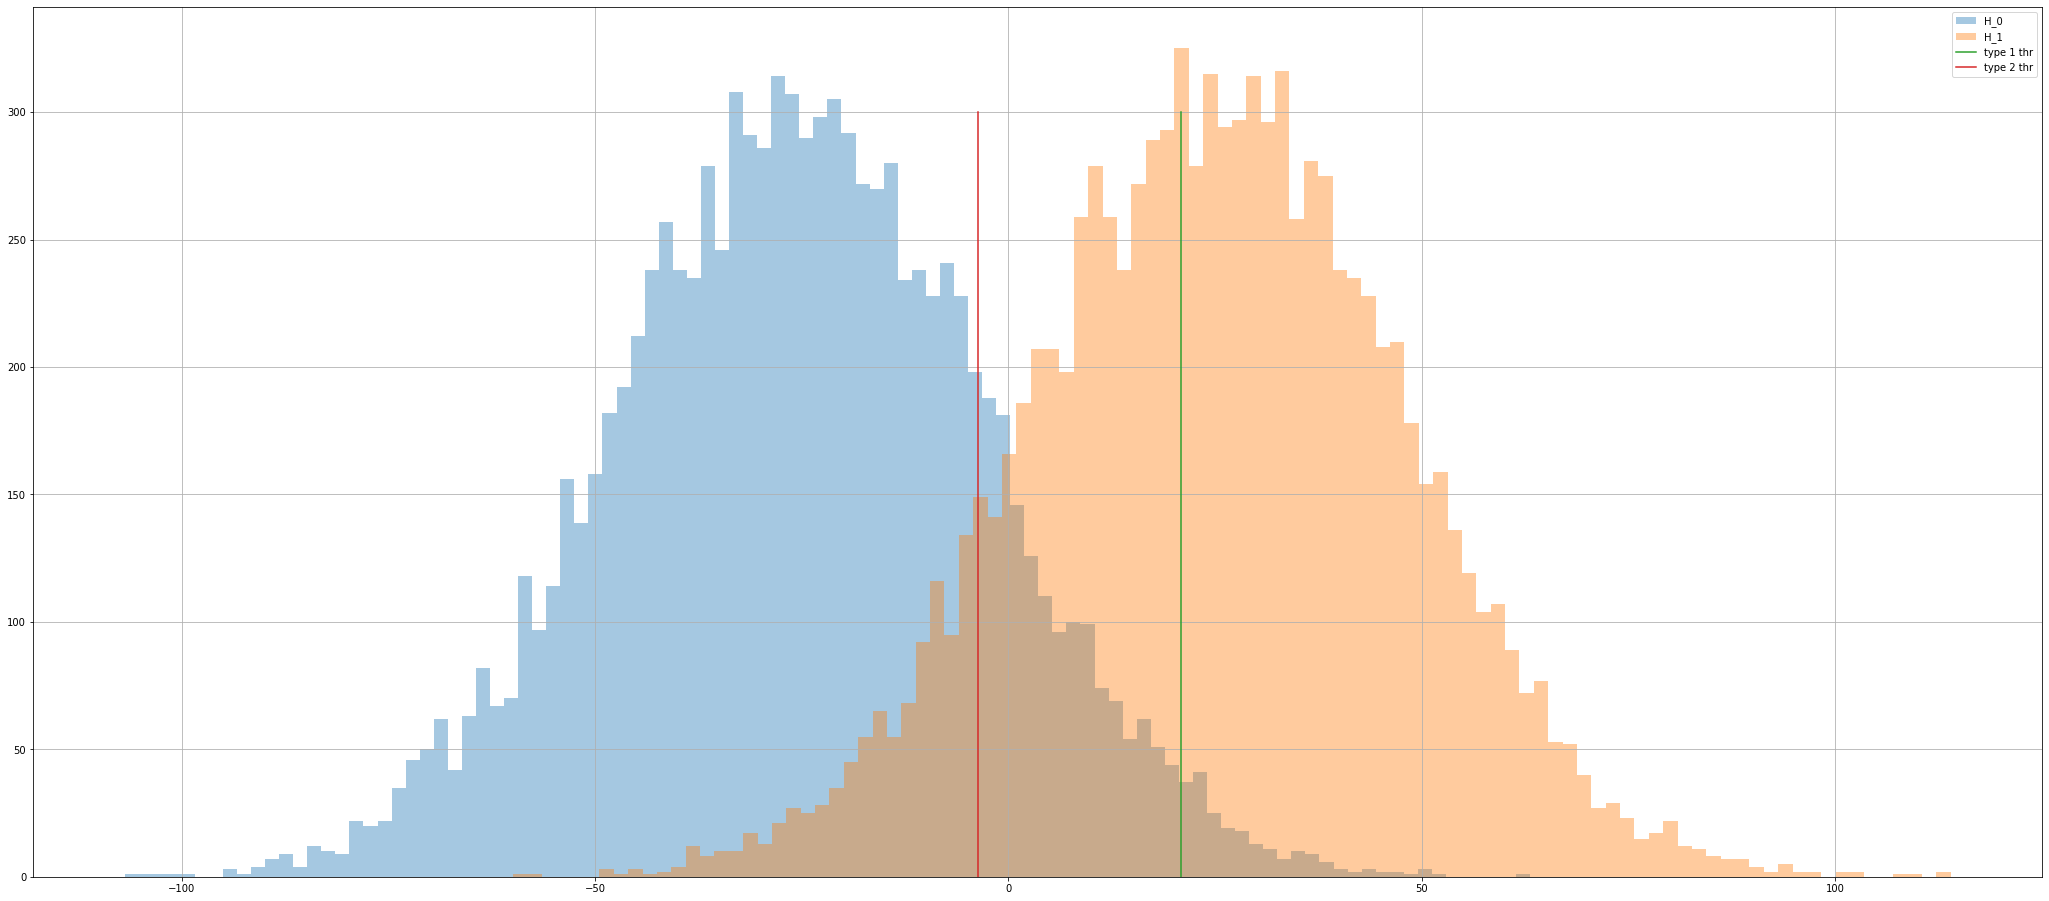

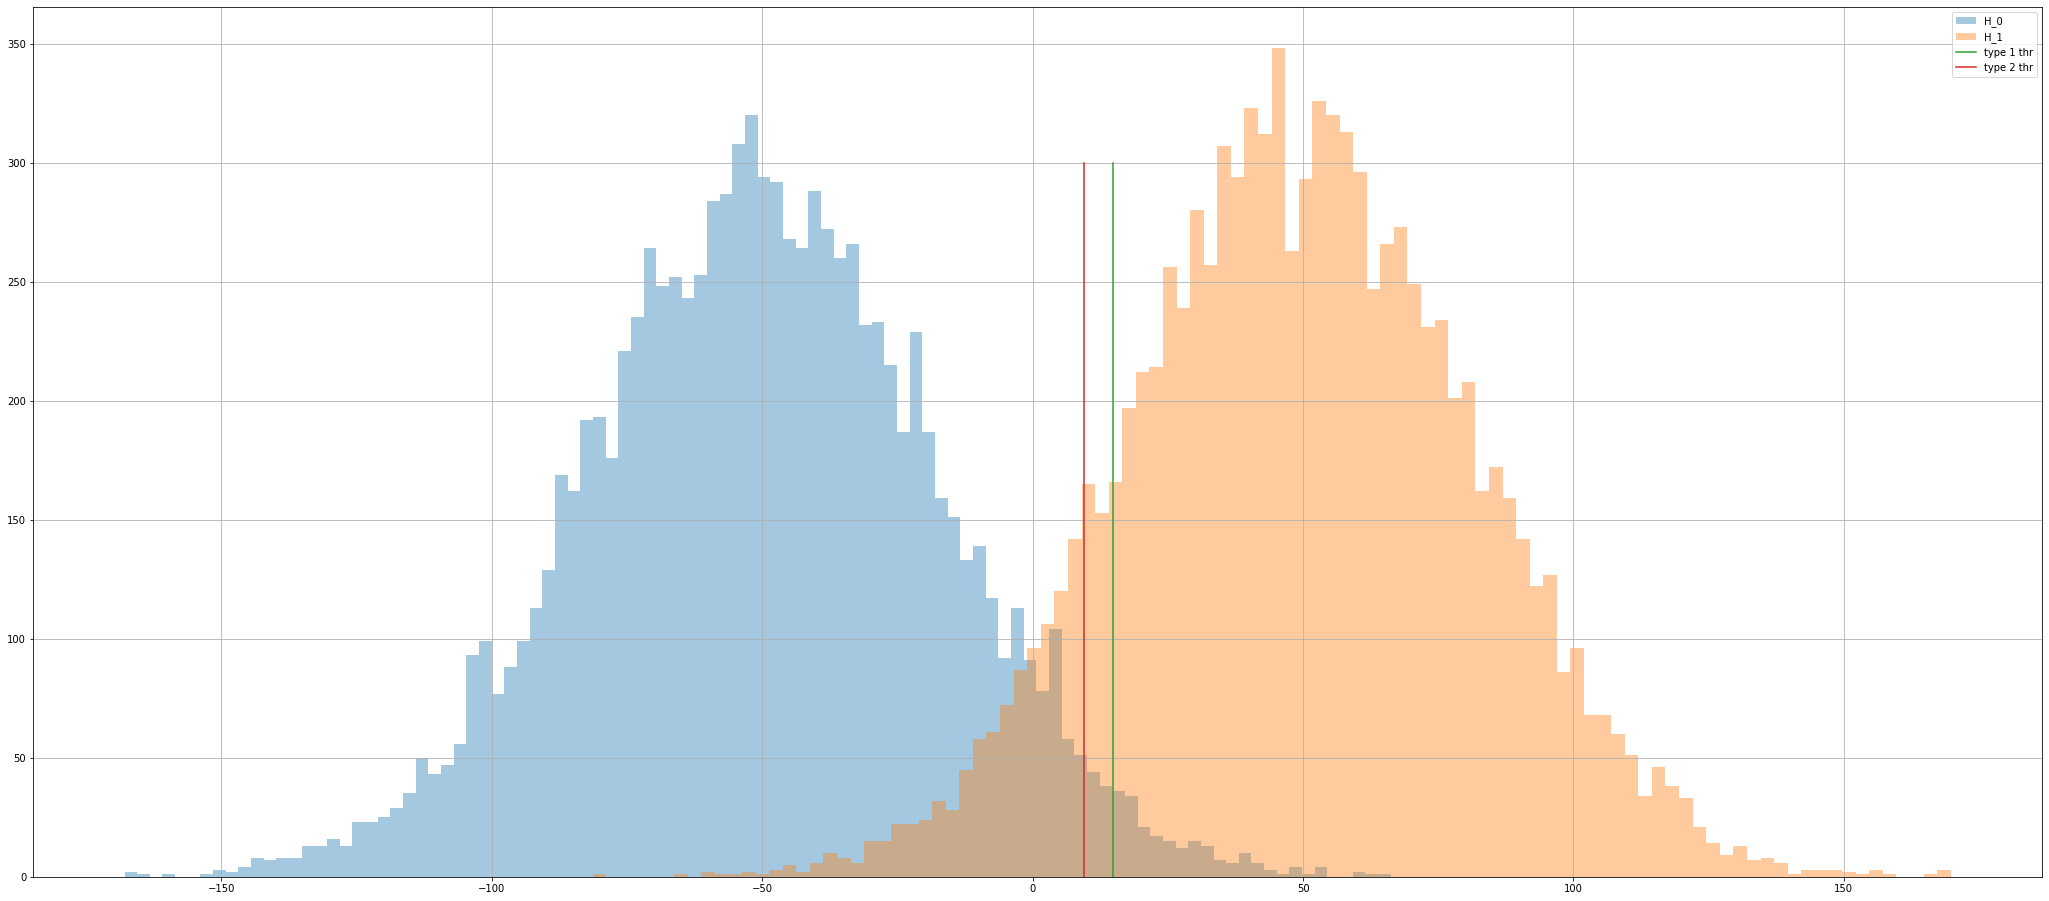

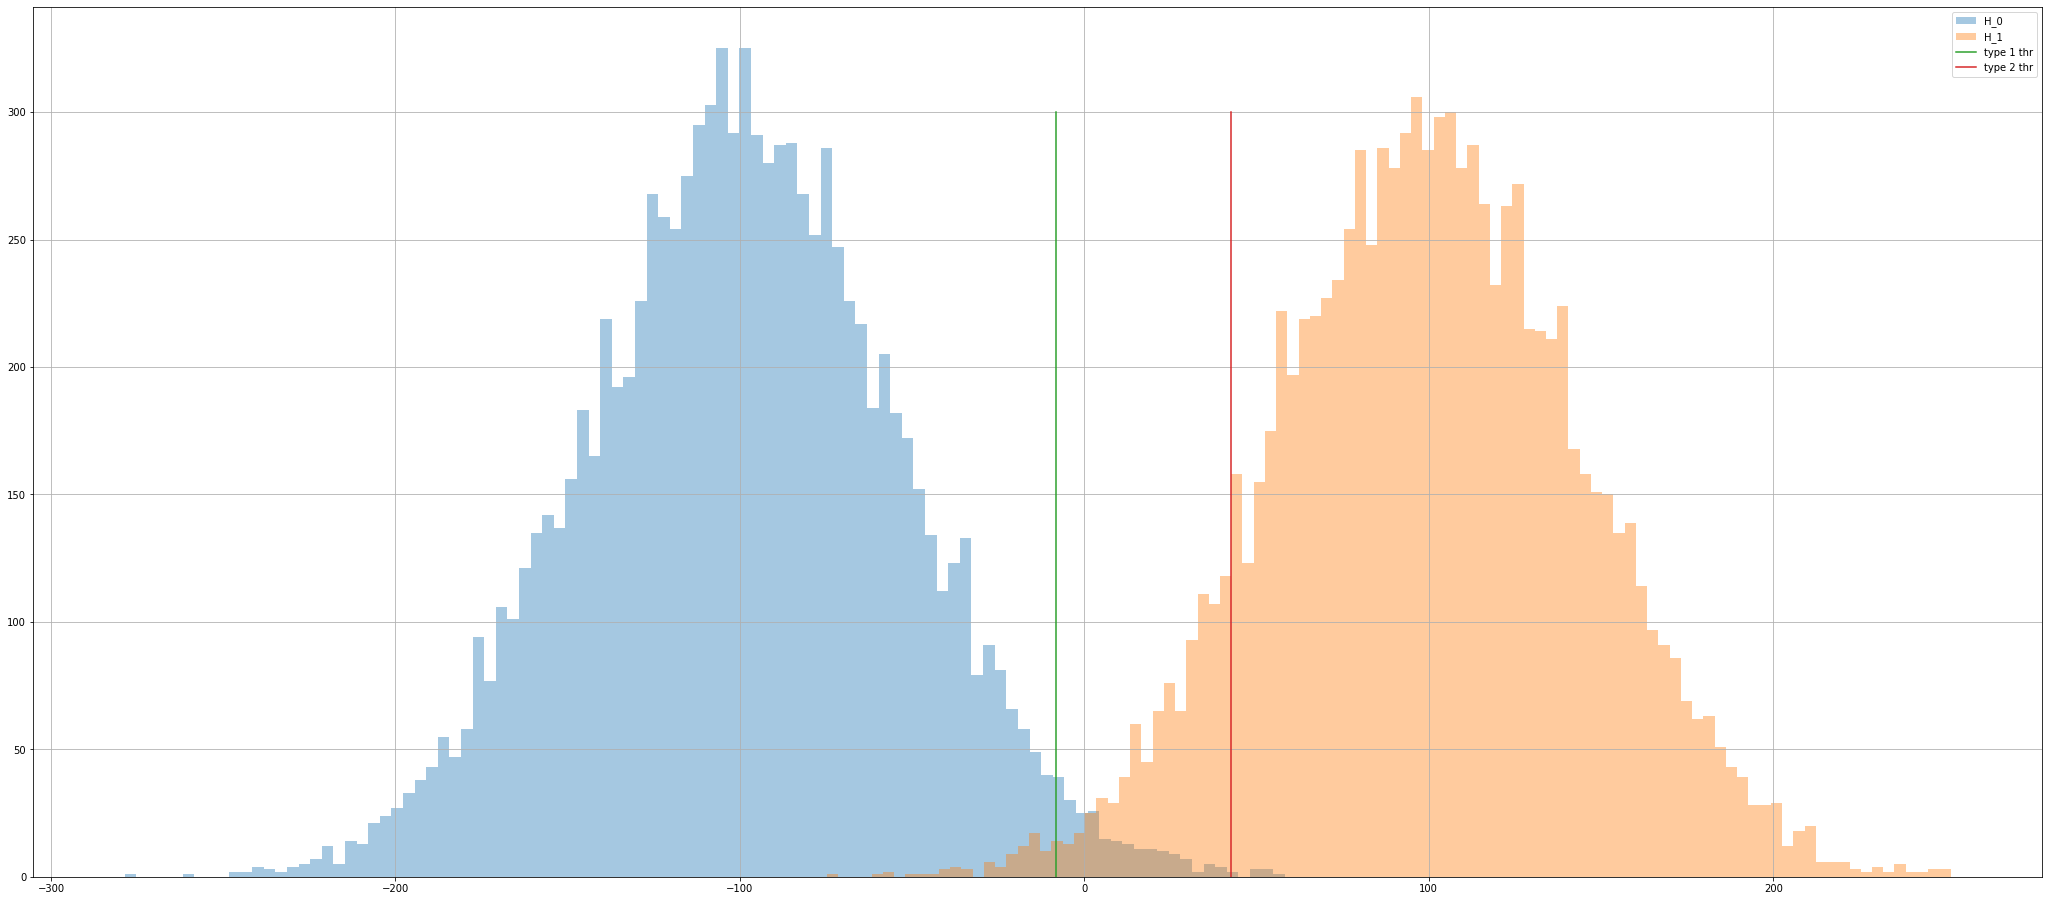

In [12]:
for size in [100, 500, 1000, 2000]:
    stat1, stat2 = [], []
    for i in range(10000):
        data1 = np.random.normal(mu1, sigma, size)
        data2 = np.random.normal(mu2, sigma, size)

        t1 = (2 * data1.sum() * (mu2 - mu1) + size * (mu1**2 - mu2**2)) / sigma / 2
        t2 = (2 * data2.sum() * (mu2 - mu1) + size * (mu1**2 - mu2**2)) / sigma / 2
        stat1.append(t1)
        stat2.append(t2)
    
    c1 = norm.ppf(1 - alpha, loc=(2 * size * mu1 * (mu2 - mu1) + size * (mu1**2 - mu2**2)) / 2 / sigma, scale=np.sqrt(size * (mu1 - mu2)**2))
    c2 = norm.ppf(beta, loc=(2 * size * mu2 * (mu2 - mu1) + size * (mu1**2 - mu2**2)) / 2 / sigma, scale=np.sqrt(size * (mu1 - mu2)**2))
    
    plt.figure(figsize=(36, 16))
    plt.hist(stat1, bins=100, alpha=0.4, label='H_0')
    plt.hist(stat2, bins=100, alpha=0.4, label='H_1')
    plt.plot([c1, c1], [0, 300], label='type 1 thr')
    plt.plot([c2, c2], [0, 300], label='type 2 thr')
    plt.legend()
    plt.grid()
    plt.show()

In [16]:
num_tests = 2000
res1, res2 = [], []
for size in tqdm(range(5, np.ceil(n).astype(int) * 2, 10)):
    res1.append(0)
    res2.append(0)
    c1 = norm.ppf(1 - alpha, loc=(2 * size * mu1 * (mu2 - mu1) + size * (mu1**2 - mu2**2)) / 2 / sigma, scale=np.sqrt(size * (mu1 - mu2)**2))
    c2 = norm.ppf(beta, loc=(2 * size * mu2 * (mu2 - mu1) + size * (mu1**2 - mu2**2)) / 2 / sigma, scale=np.sqrt(size * (mu1 - mu2)**2))
    c = np.min([c1, c2])
    for i in range(num_tests):
        data1 = np.random.normal(mu1, sigma, size)
        data2 = np.random.normal(mu2, sigma, size)

        t1 = (2 * data1.sum() * (mu2 - mu1) + size * (mu1**2 - mu2**2)) / sigma / 2
        t2 = (2 * data2.sum() * (mu2 - mu1) + size * (mu1**2 - mu2**2)) / sigma / 2
        res1[-1] += t1 <= c
        res2[-1] += t2 <= c
    res1[-1] /= num_tests
    res2[-1] /= num_tests

  0%|          | 0/223 [00:00<?, ?it/s]

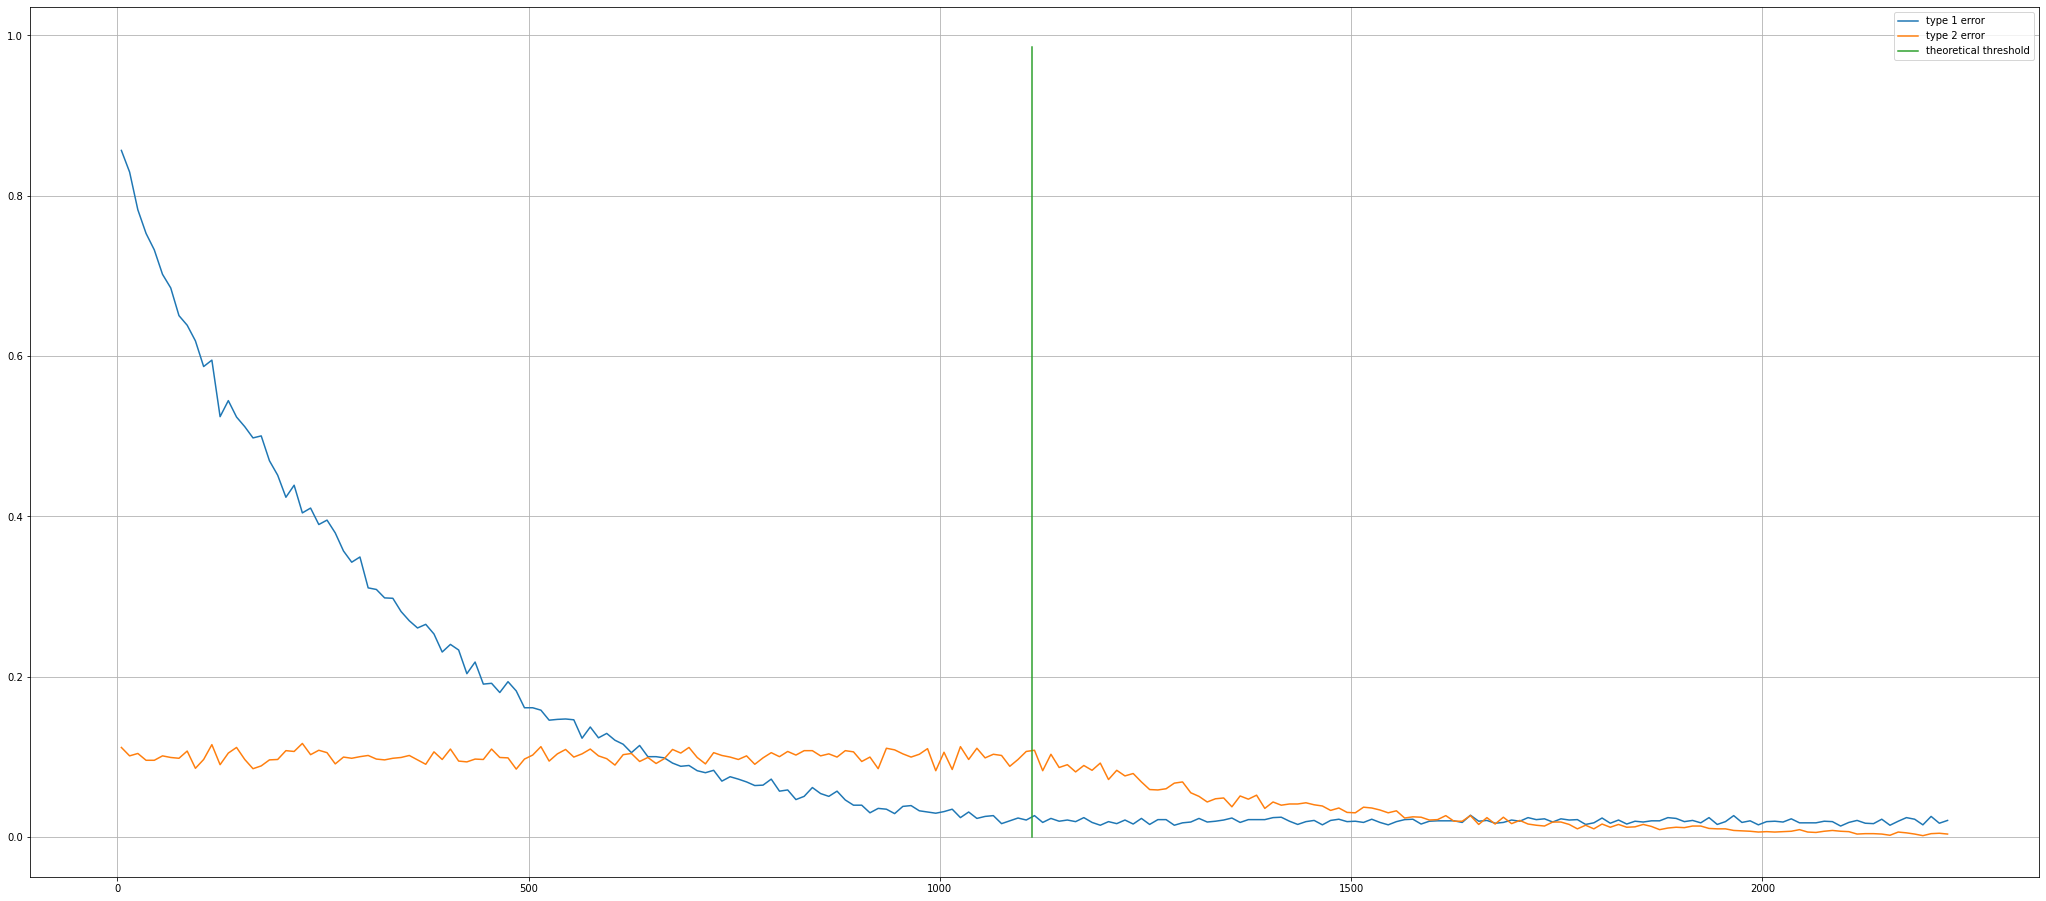

In [17]:
plt.figure(figsize=(36, 16))
plt.plot(list(range(5, np.ceil(n).astype(int) * 2, 10)), 1 - np.asarray(res1), label='type 1 error')
plt.plot(list(range(5, np.ceil(n).astype(int) * 2, 10)), res2, label='type 2 error')
plt.plot([n, n], [0, max(np.max(res2), np.max(res1))], label='theoretical threshold')
plt.legend()
plt.grid()
plt.show()

In [34]:
alpha = 0.02
beta = 0.1

lambda1 = 0.45
lambda2 = 0.5

#n = 

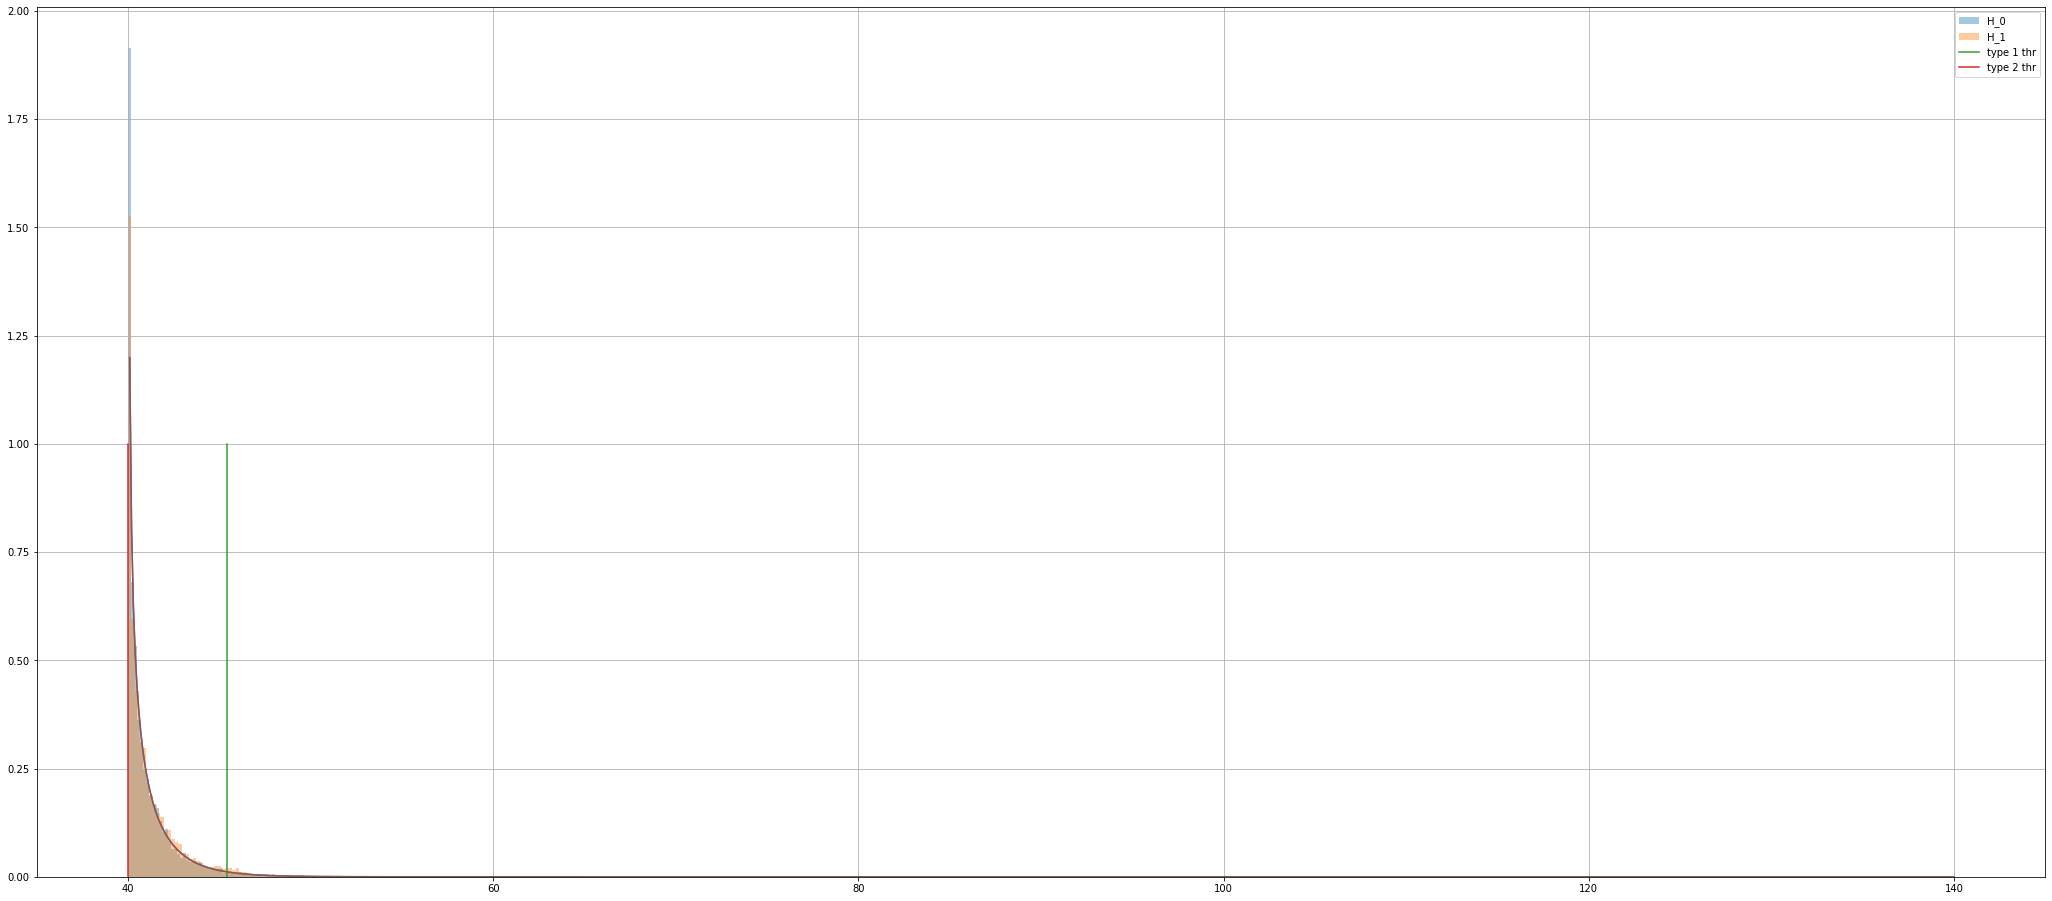

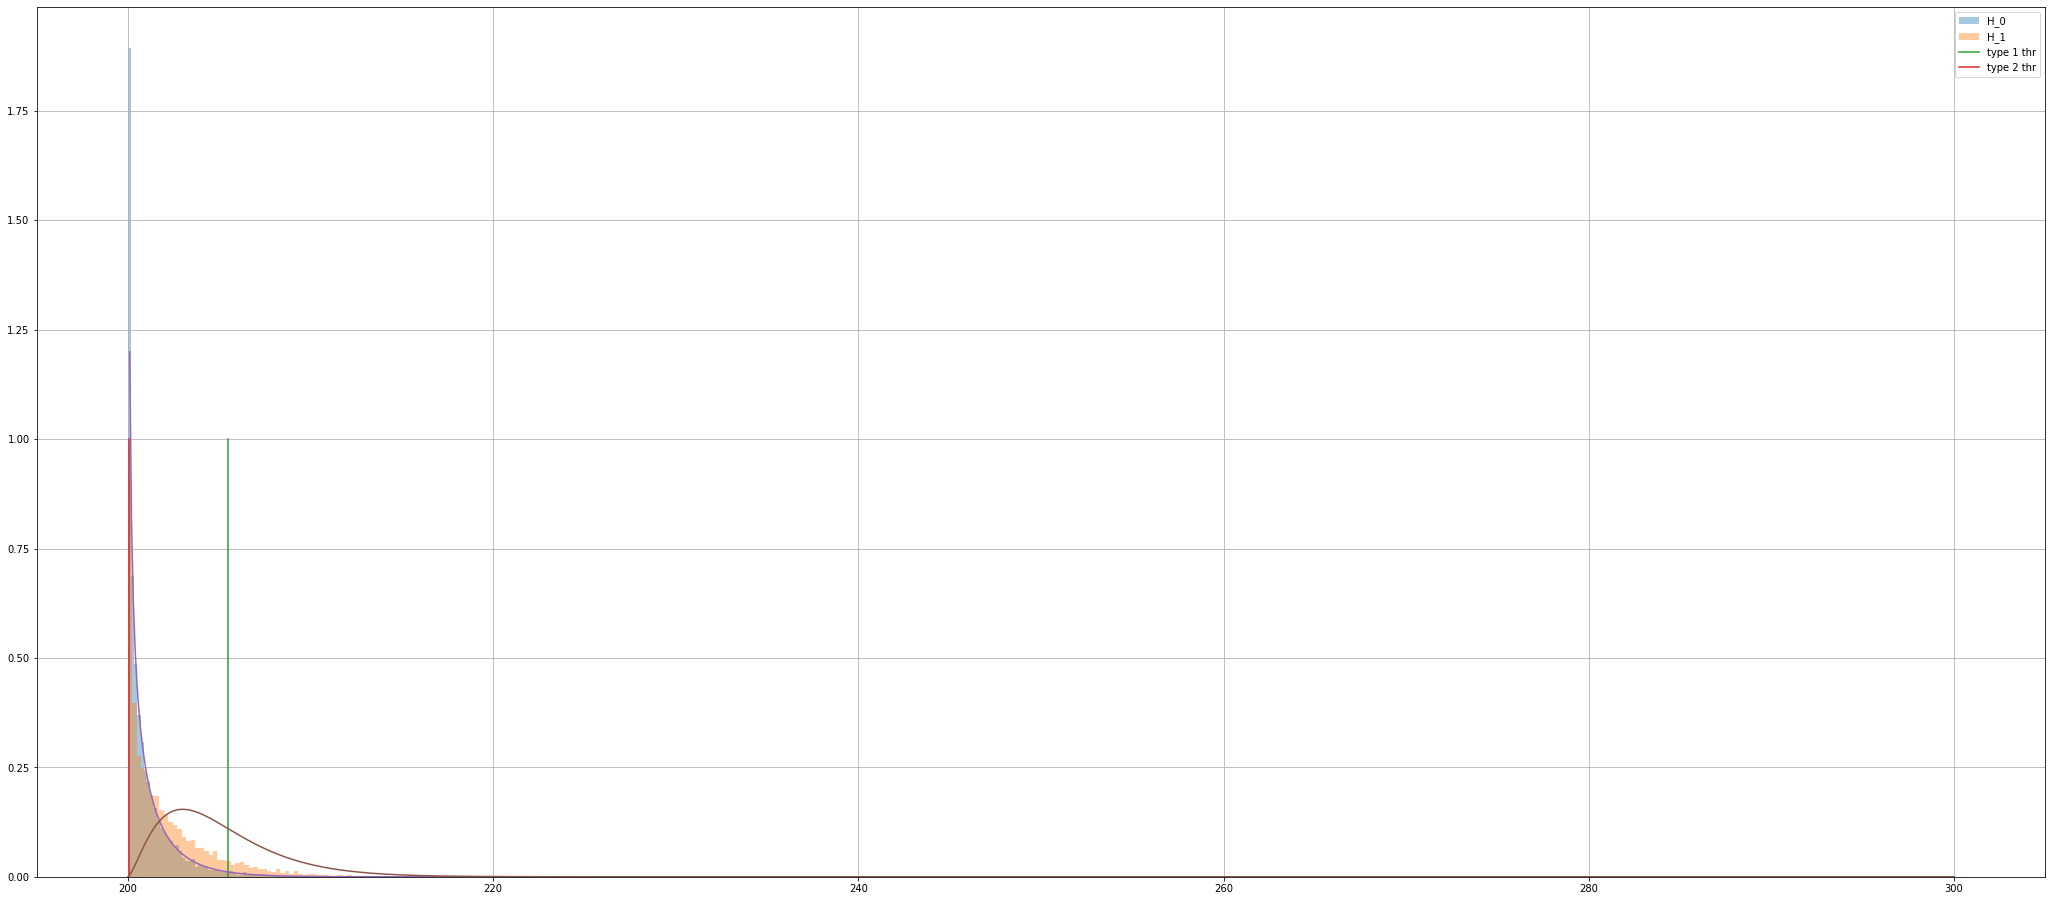

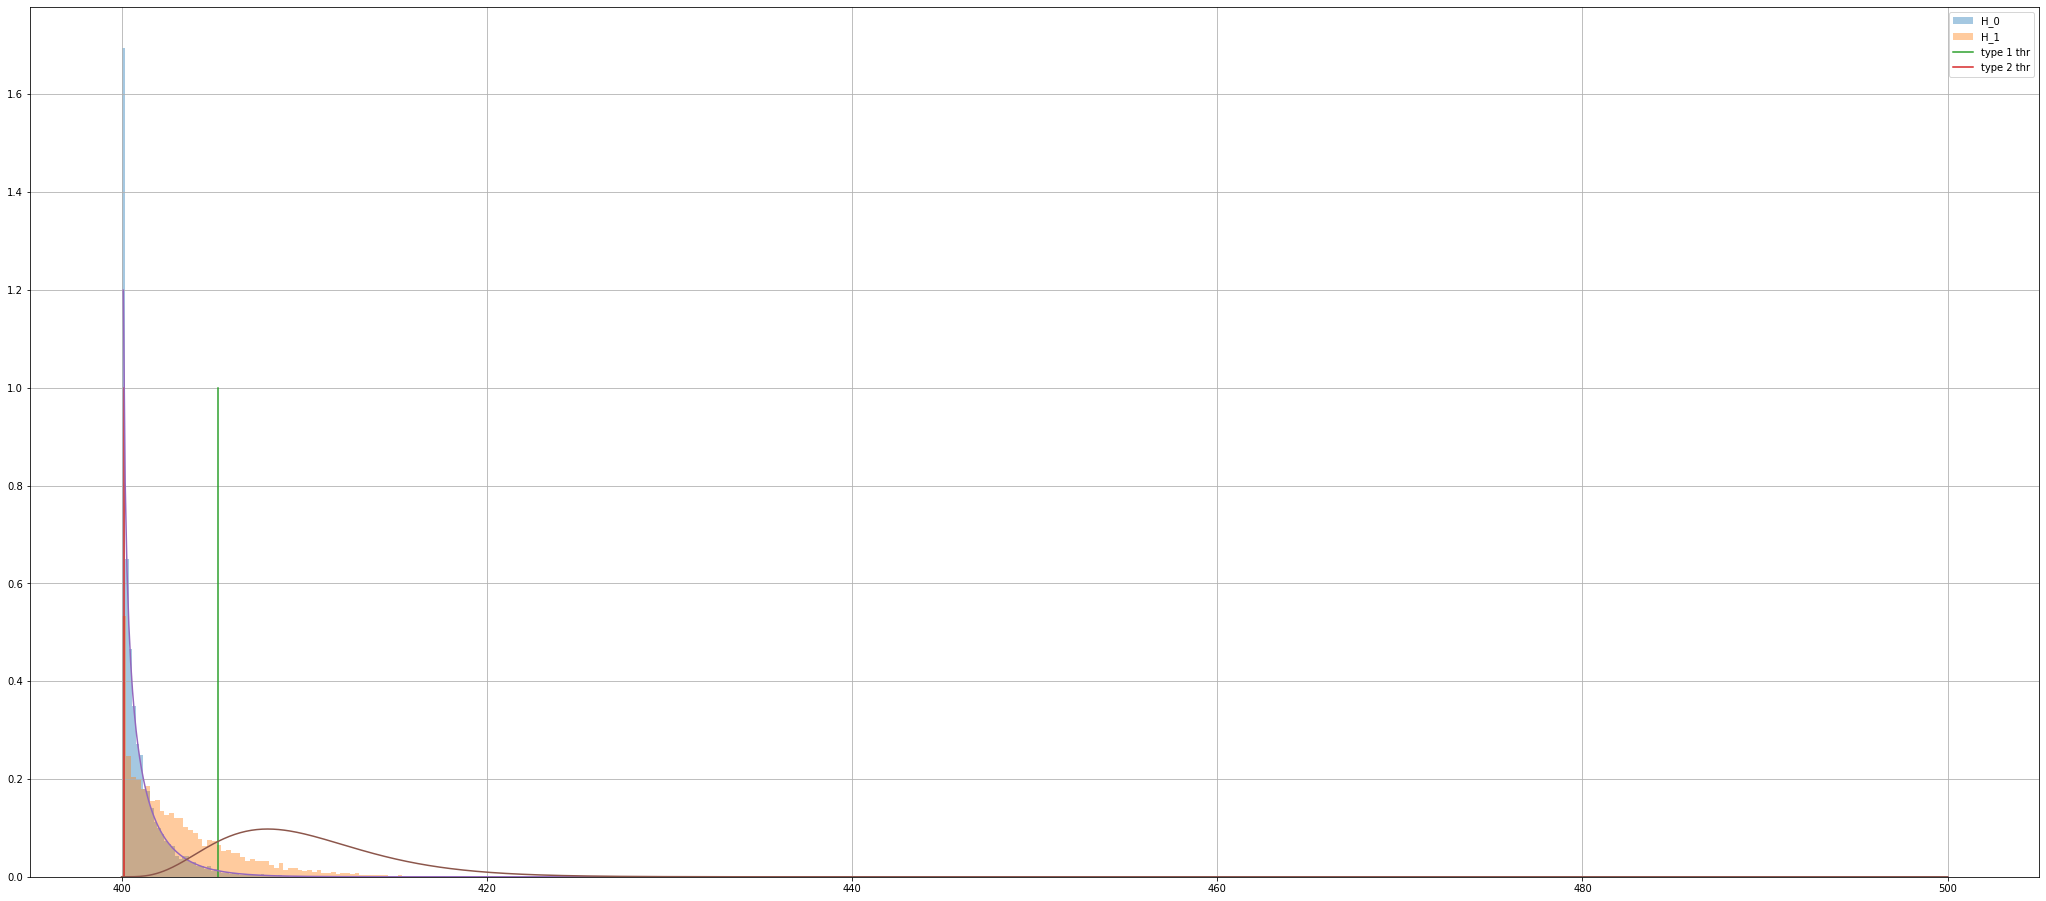

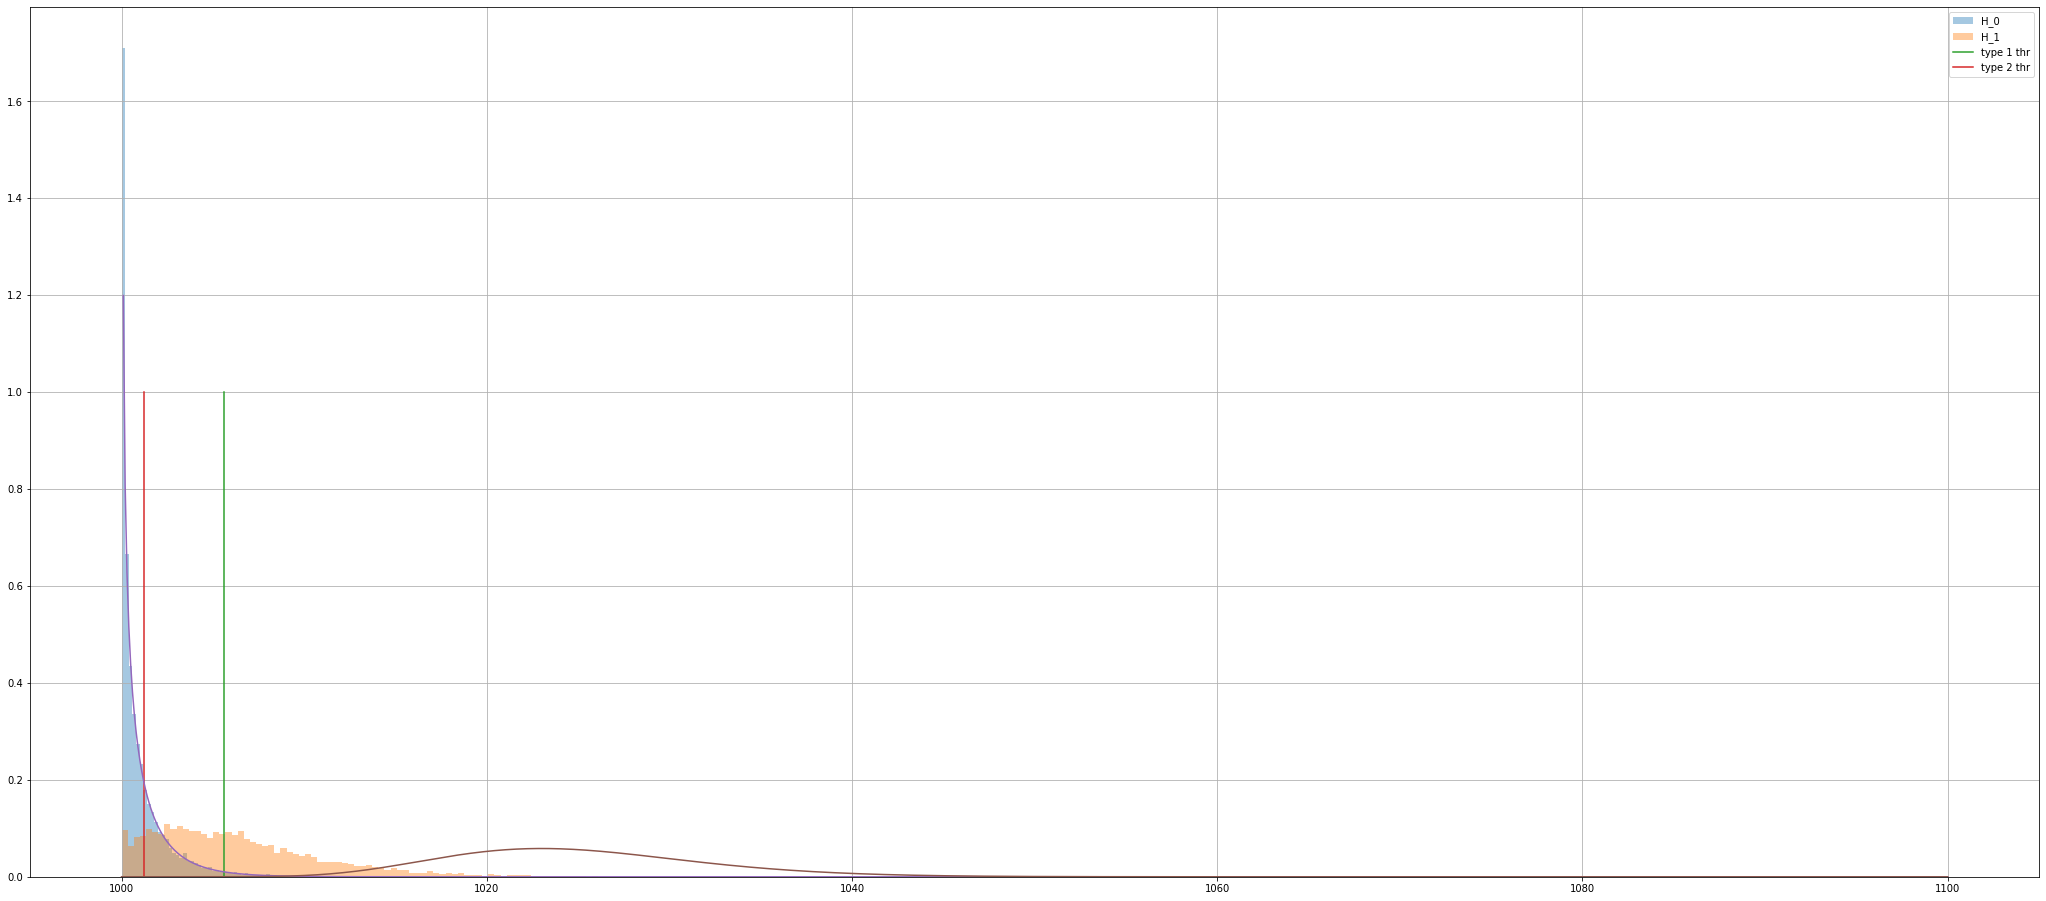

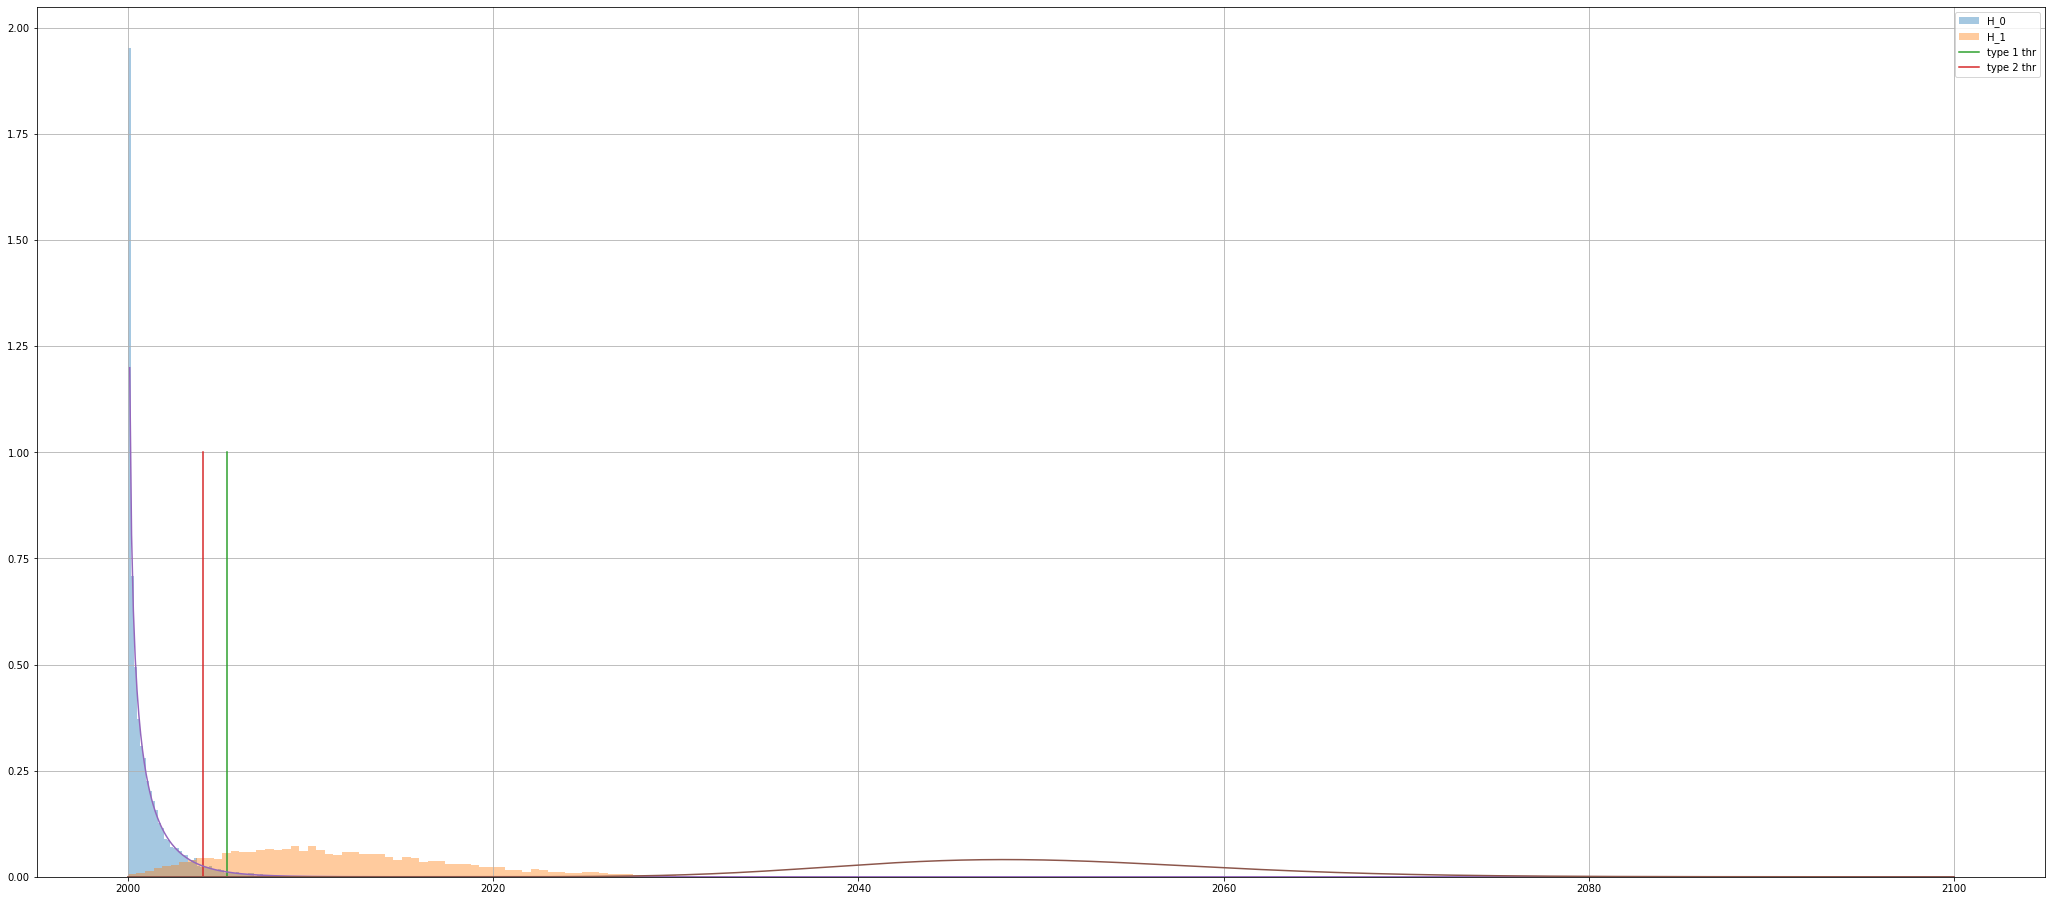

In [35]:
for size in [20, 100, 200, 500, 1000]:
    stat1, stat2 = [], []
    for i in range(10000):
        data1 = np.random.exponential(1 / lambda1, size)
        data2 = np.random.exponential(1 / lambda2, size)

        t1 = -2 * (size * np.log(data1.mean()) + size * np.log(lambda1) - data1.sum() * lambda1)
        t2 = -2 * (size * np.log(data2.mean()) + size * np.log(lambda1) - data2.sum() * lambda1)
        stat1.append(t1)
        stat2.append(t2)
        
    c1 = np.quantile(stat1, 1 - alpha)
    c2 = np.quantile(stat2, beta)
    
    plt.figure(figsize=(36, 16))
    plt.hist(stat1, bins=100, alpha=0.4, label='H_0', density=True)
    plt.hist(stat2, bins=100, alpha=0.4, label='H_1', density=True)
    plt.plot([c1, c1], [0, 1], label='type 1 thr')
    plt.plot([c2, c2], [0, 1], label='type 2 thr')
    plt.plot(np.linspace(2 * size, 2 * size + 100, 1000), chi2.pdf(np.linspace(0, 100, 1000), 1))
    plt.plot(np.linspace(2 * size, 2 * size + 100, 1000), chi2.pdf(np.linspace(0, 100, 1000), size / 20))
    plt.legend()
    plt.grid()
    plt.show()

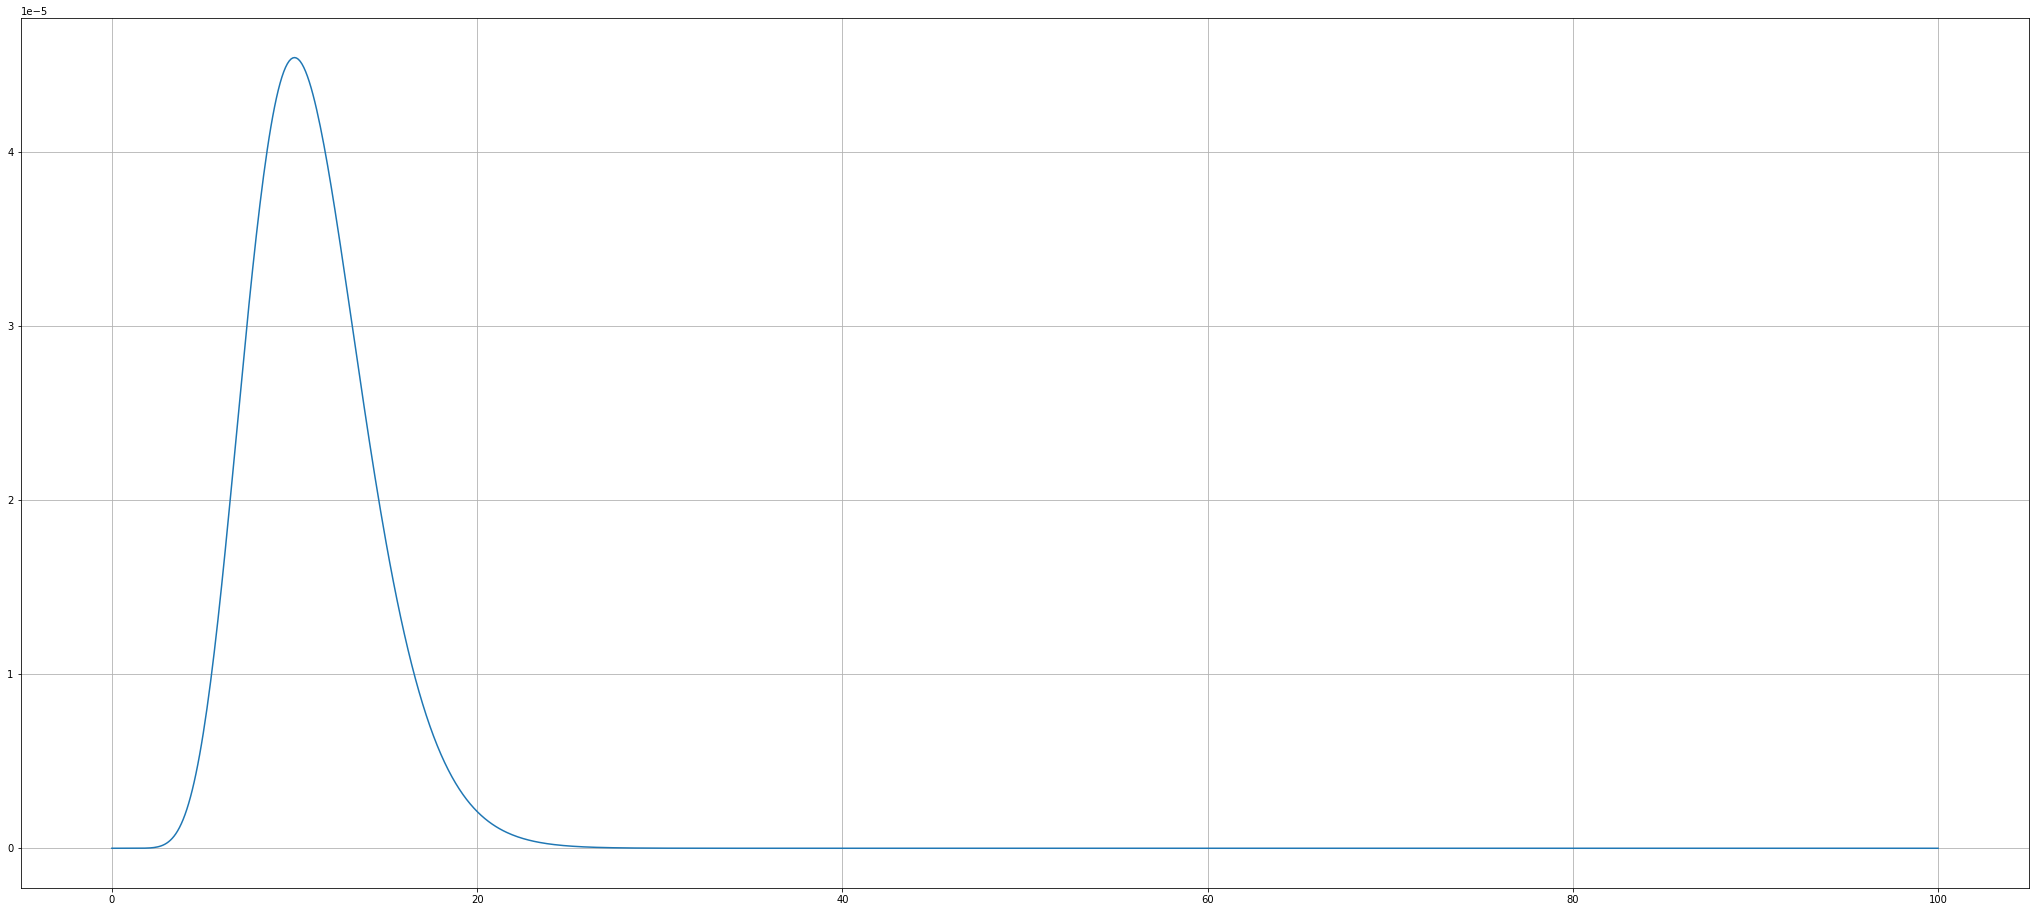

In [25]:
def f(x, n, lam):
    x = x * lam
    return x**n * np.exp(-n * x)

plt.figure(figsize=(36, 16))
plt.plot(np.linspace(0, 100, 1000), f(np.linspace(0, 100, 1000), 10, 0.1))
# plt.plot(np.linspace(0, 100, 1000), log_f(np.linspace(0, 100, 1000), 1))
plt.grid()
plt.show()

In [36]:
res1, res2 = [], []
space = np.arange(10, 1500, 20)
for size in tqdm(space):
    res1.append(0)
    res2.append(0)
    stat1, stat2 = [], []
    for i in range(10000):
        data1 = np.random.exponential(1 / lambda1, size)
        data2 = np.random.exponential(1 / lambda2, size)

        t1 = -2 * (size * np.log(data1.mean()) + size * np.log(lambda1) - data1.sum() * lambda1)
        t2 = -2 * (size * np.log(data2.mean()) + size * np.log(lambda1) - data2.sum() * lambda1)
        stat1.append(t1)
        stat2.append(t2)
        
    c1 = np.quantile(stat1, 1 - alpha)
    c2 = np.quantile(stat2, beta)
    c = np.mean([c1, c2])
    
    for i in range(num_tests):
        data1 = np.random.exponential(1 / lambda1, size)
        data2 = np.random.exponential(1 / lambda2, size)

        t1 = -2 * (size * np.log(data1.mean()) + size * np.log(lambda1) - data1.sum() * lambda1)
        t2 = -2 * (size * np.log(data2.mean()) + size * np.log(lambda1) - data2.sum() * lambda1)
        res1[-1] += t1 < c
        res2[-1] += t2 < c
    res1[-1] /= num_tests
    res2[-1] /= num_tests

  0%|          | 0/75 [00:00<?, ?it/s]

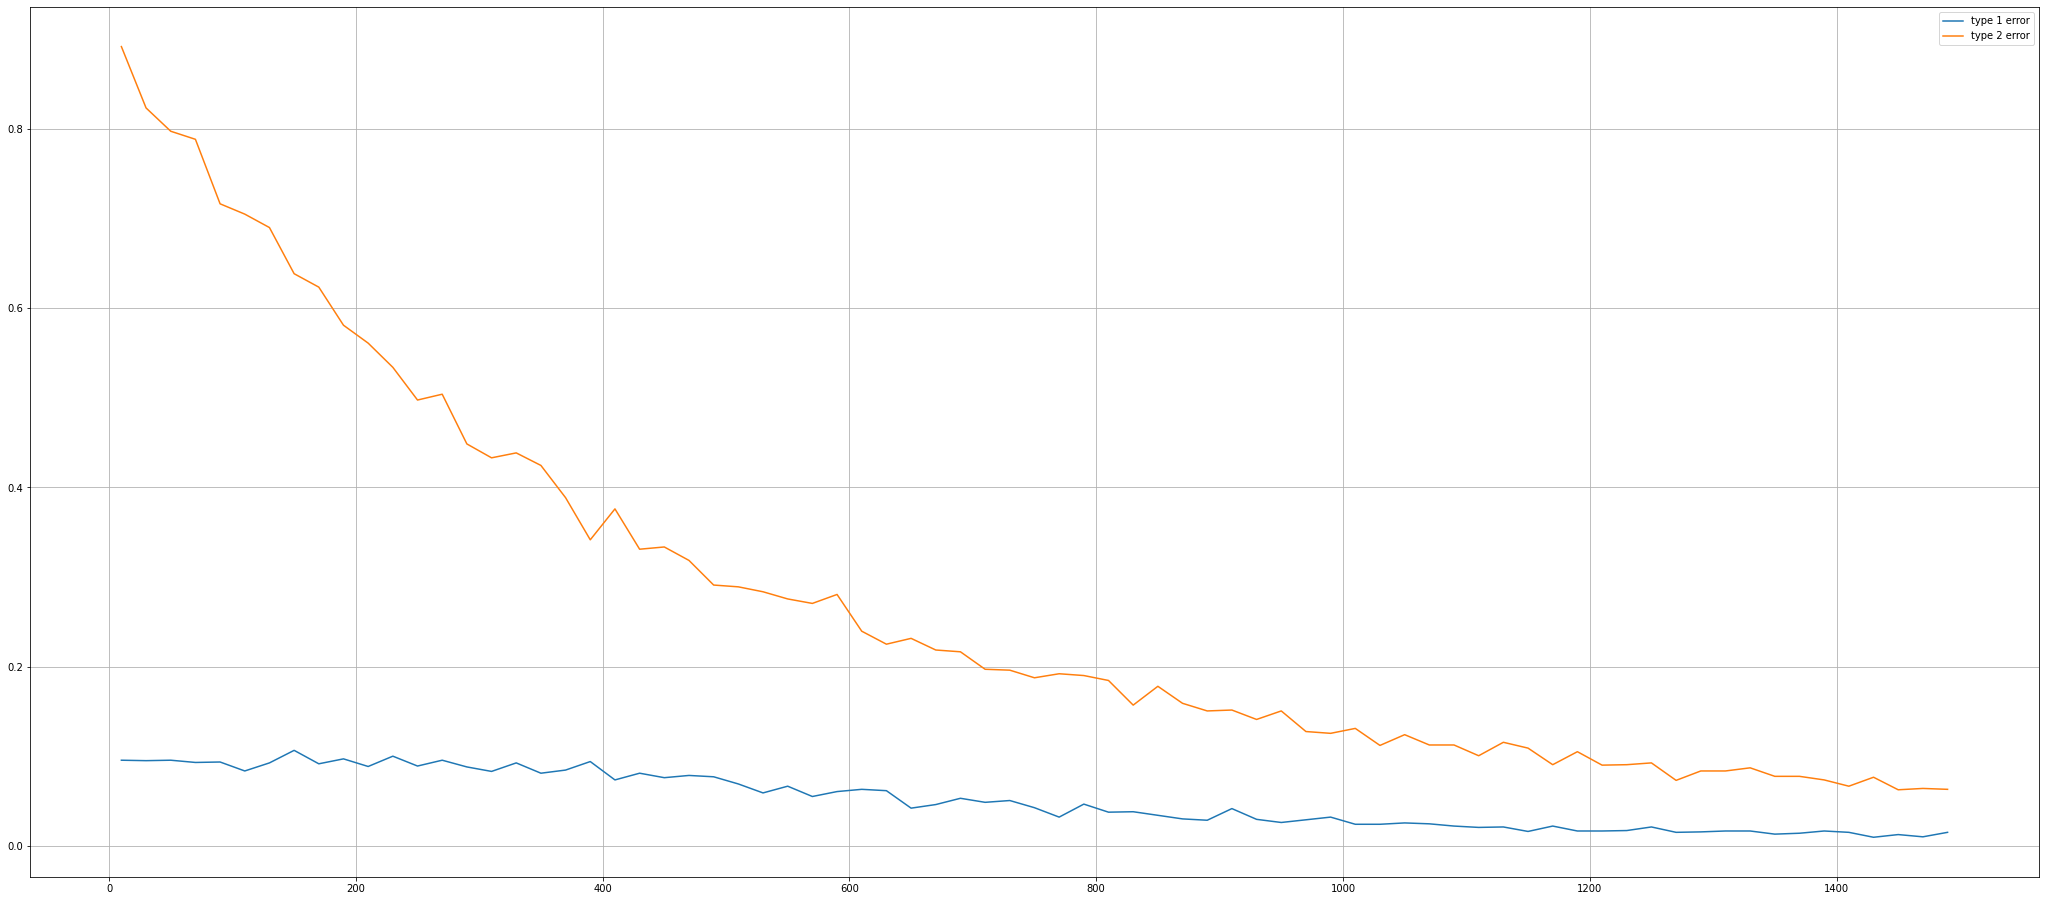

In [37]:
plt.figure(figsize=(36, 16))
plt.plot(space, 1 - np.asarray(res1), label='type 1 error')
plt.plot(space, np.asarray(res2), label='type 2 error')
plt.legend()
plt.grid()
plt.show()